# Analysis of results

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [12]:
def get_dataset_characteristics(mydir):
    info = {}
    for file in os.listdir(mydir): # iterate through all files in the directory
        print(file)
        if '.csv' not in file:
            continue
        info_d = {'name':file.split('/')[-1].split('.csv')[0]}
        df = pd.read_csv(mydir+file) # read each csv file into a pandas DataFrame
        info_d['n_samples'] = df.shape[0]
        info_d['n_feat'] = df.shape[1]-1
        frac = df['class'].value_counts()
        info_d['fraction_minority'] = df['class'].value_counts().min()/df.shape[0]
        info[info_d['name']] = info_d
    return info

In [13]:
dataset_dir = '/Users/giovannanicora/Documents/progetti_in_corso/tabular_fm_medical_benchmark/dataset_last/'
info_dataset = get_dataset_characteristics(dataset_dir)

hepatitis.csv
.DS_Store
student_depression_dataset.csv
myocardial_infarction_complications.csv
thyroid_cancer.csv
parkinson.csv
glioma.csv
cyrrosis.csv


In [14]:
info_dataset

{'hepatitis': {'name': 'hepatitis',
  'n_samples': 155,
  'n_feat': 20,
  'fraction_minority': 0.2064516129032258},
 'student_depression_dataset': {'name': 'student_depression_dataset',
  'n_samples': 27901,
  'n_feat': 17,
  'fraction_minority': 0.41450127235582956},
 'myocardial_infarction_complications': {'name': 'myocardial_infarction_complications',
  'n_samples': 1700,
  'n_feat': 112,
  'fraction_minority': 0.007058823529411765},
 'thyroid_cancer': {'name': 'thyroid_cancer',
  'n_samples': 383,
  'n_feat': 17,
  'fraction_minority': 0.2819843342036554},
 'parkinson': {'name': 'parkinson',
  'n_samples': 195,
  'n_feat': 23,
  'fraction_minority': 0.24615384615384617},
 'glioma': {'name': 'glioma',
  'n_samples': 839,
  'n_feat': 24,
  'fraction_minority': 0.4195470798569726},
 'cyrrosis': {'name': 'cyrrosis',
  'n_samples': 418,
  'n_feat': 18,
  'fraction_minority': 0.05980861244019139}}

In [15]:
info_dataset.keys()

dict_keys(['hepatitis', 'student_depression_dataset', 'myocardial_infarction_complications', 'thyroid_cancer', 'parkinson', 'glioma', 'cyrrosis'])

In [50]:
# reading results
results_dir = '/Users/giovannanicora/PycharmProjects/tabular-fm-medical-benchmark/'

results_dict = {}
for d in info_dataset.keys():
    dataset = str(d)
    if 'depression' in dataset:
        dataset = 'depression'
    if 'myocardial_infarction_complications' in dataset:
        dataset = 'myocardial'
    if 'cyrro' in dataset:
        dataset = 'chirrosis'

    fpath_results = [x for x in os.listdir(results_dir) if dataset in x][0]

    df_res = pd.read_csv(results_dir+fpath_results)
    #df_res = df_res.replace(to_replace="-+--", value='0', regex=False)


    f1_list = [(x.split('+')[0]) for x in df_res['100%']]
    f1_ml = f1_list[:2]
    f1_fm = f1_list[2:]
    results_dict[d] = {'f1_ml':[], 'f1_fm':[]}
    for f in f1_ml:
        try:
            results_dict[d]['f1_ml'].append(float(f))
        except:
            continue
    

    for f in f1_fm:
        try:
            results_dict[d]['f1_fm'].append(float(f))
        except:
            continue


In [51]:
results_dict

{'hepatitis': {'f1_ml': [0.57, 0.62],
  'f1_fm': [0.65, 0.4, 0.57, 0.29, 0.66, 0.36, 0.55]},
 'student_depression_dataset': {'f1_ml': [0.81, 0.82],
  'f1_fm': [0.81, 0.81, 0.8, 0.79, 0.81]},
 'myocardial_infarction_complications': {'f1_ml': [0.57, 0.52],
  'f1_fm': [0.54, 0.57, 0.55, 0.57, 0.49, 0.29, 0.53]},
 'thyroid_cancer': {'f1_ml': [0.92, 0.92],
  'f1_fm': [0.93, 0.93, 0.93, 0.93, 0.94, 0.28, 0.94]},
 'parkinson': {'f1_ml': [0.79, 0.63],
  'f1_fm': [0.91, 0.92, 0.93, 0.91, 0.95, 0.52, 0.91]},
 'glioma': {'f1_ml': [0.86, 0.86],
  'f1_fm': [0.86, 0.86, 0.86, 0.86, 0.85, 0.04, 0.86]},
 'cyrrosis': {'f1_ml': [0.53, 0.56], 'f1_fm': [0.49, 0.5, 0.42, 0.26, 0.5]}}

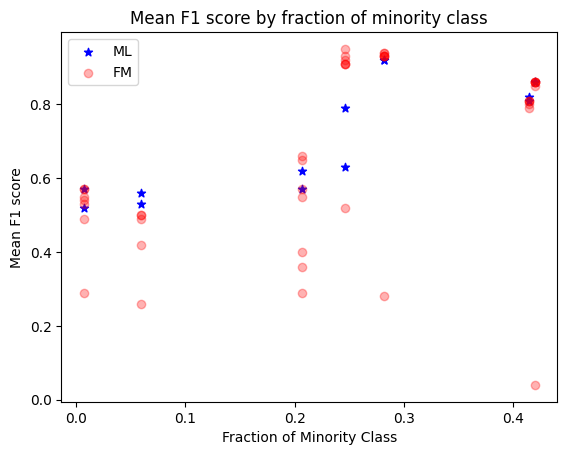

In [92]:
# mean f1 score divided by ML vs FM for different fractions of imbalanced ratio
fig, ax = plt.subplots()
count=0
for k in info_dataset.keys():
    fr_min_class = info_dataset[k]['fraction_minority']
    res_ml = results_dict[k]['f1_ml']
    res_fm = results_dict[k]['f1_fm']
    if count==0:
        plt.scatter([fr_min_class]*len(res_ml), [res_ml], color='blue', label='ML', marker='*', )
        plt.scatter([fr_min_class]*len(res_fm), [res_fm], color='red', label='FM', marker='o', alpha=0.3)
    else:
        plt.scatter([fr_min_class]*len(res_ml), [res_ml], color='blue',marker='*')
        plt.scatter([fr_min_class]*len(res_fm), [res_fm], color='red', marker='o', alpha=0.3)
        
    count += 1
plt.legend()
plt.xlabel('Fraction of Minority Class')
plt.ylabel('Mean F1 score')
plt.title('Mean F1 score by fraction of minority class')
plt.show()

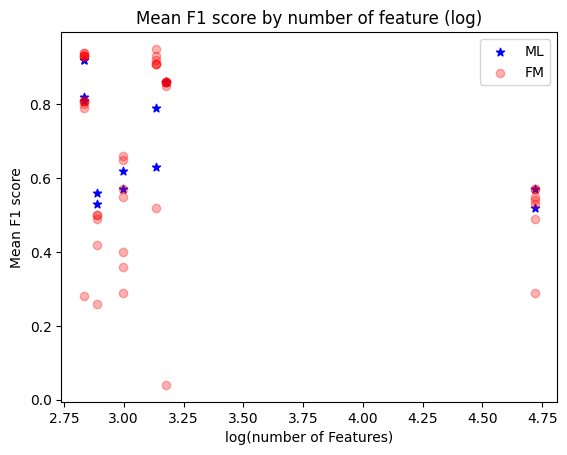

In [94]:
# mean f1 score divided by ML vs FM for different number of feat
fig, ax = plt.subplots()
count=0
for k in info_dataset.keys():
    fr_min_class = info_dataset[k]['n_feat']
    res_ml = results_dict[k]['f1_ml']
    res_fm = results_dict[k]['f1_fm']
    if count==0:
        plt.scatter([np.log(fr_min_class)]*len(res_ml), [res_ml], color='blue', label='ML', marker='*')
        plt.scatter([np.log(fr_min_class)]*len(res_fm), [res_fm], color='red', label='FM', marker='o', alpha=0.3)
    else:
        plt.scatter([np.log(fr_min_class)]*len(res_ml), [res_ml], color='blue',marker='*')
        plt.scatter([np.log(fr_min_class)]*len(res_fm), [res_fm], color='red', marker='o', alpha=0.3)
        
    count += 1
plt.legend()
plt.xlabel('log(number of Features)')
plt.ylabel('Mean F1 score')
plt.title('Mean F1 score by number of feature (log)')
plt.show()

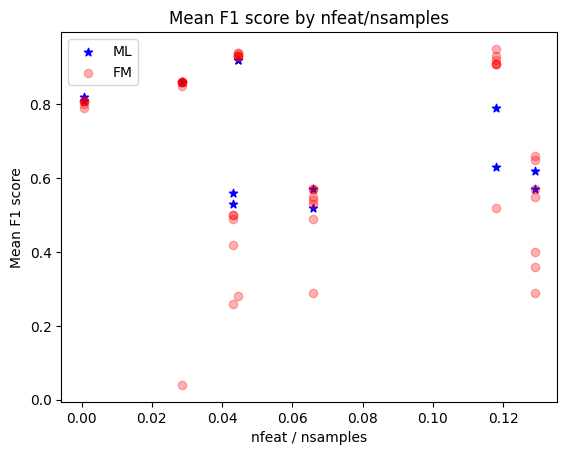

In [95]:
# mean f1 score divided by ML vs FM for different fractions of n_feat/nsamples
fig, ax = plt.subplots()
count=0
for k in info_dataset.keys():
    fr_min_class = info_dataset[k]['n_feat']/info_dataset[k]['n_samples']
    res_ml = results_dict[k]['f1_ml']
    res_fm = results_dict[k]['f1_fm']
    if count==0:
        plt.scatter([fr_min_class]*len(res_ml), [res_ml], color='blue', label='ML', marker='*')
        plt.scatter([fr_min_class]*len(res_fm), [res_fm], color='red', label='FM', marker='o', alpha=0.3)
    else:
        plt.scatter([fr_min_class]*len(res_ml), [res_ml], color='blue',marker='*')
        
        plt.scatter([fr_min_class]*len(res_fm), [res_fm], color='red', marker='o', alpha=0.3
        )
    count += 1
plt.legend()
plt.xlabel('nfeat / nsamples')
plt.ylabel('Mean F1 score')
plt.title('Mean F1 score by nfeat/nsamples')
plt.show()

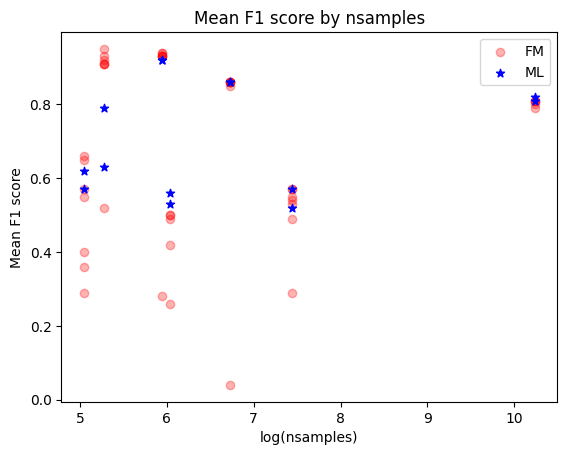

In [97]:
fig, ax = plt.subplots()
count=0
for k in info_dataset.keys():
    fr_min_class = info_dataset[k]['n_samples']
    res_ml = results_dict[k]['f1_ml']
    res_fm = results_dict[k]['f1_fm']
    if count==0:
        plt.scatter([np.log(fr_min_class)]*len(res_fm), [res_fm], color='red', label='FM', marker='o', alpha=0.3)
        plt.scatter([np.log(fr_min_class)]*len(res_ml), [res_ml], color='blue', label='ML', marker='*')
        
    else:
        plt.scatter([np.log(fr_min_class)]*len(res_fm), [res_fm], color='red', marker='o', alpha=0.3 )
        plt.scatter([np.log(fr_min_class)]*len(res_ml), [res_ml], color='blue',marker='*')
        
        
    count += 1
plt.legend()
plt.xlabel('log(nsamples)')
plt.ylabel('Mean F1 score')
plt.title('Mean F1 score by nsamples')
plt.show()

In [86]:
info_dataset


{'hepatitis': {'name': 'hepatitis',
  'n_samples': 155,
  'n_feat': 20,
  'fraction_minority': 0.2064516129032258},
 'student_depression_dataset': {'name': 'student_depression_dataset',
  'n_samples': 27901,
  'n_feat': 17,
  'fraction_minority': 0.41450127235582956},
 'myocardial_infarction_complications': {'name': 'myocardial_infarction_complications',
  'n_samples': 1700,
  'n_feat': 112,
  'fraction_minority': 0.007058823529411765},
 'thyroid_cancer': {'name': 'thyroid_cancer',
  'n_samples': 383,
  'n_feat': 17,
  'fraction_minority': 0.2819843342036554},
 'parkinson': {'name': 'parkinson',
  'n_samples': 195,
  'n_feat': 23,
  'fraction_minority': 0.24615384615384617},
 'glioma': {'name': 'glioma',
  'n_samples': 839,
  'n_feat': 24,
  'fraction_minority': 0.4195470798569726},
 'cyrrosis': {'name': 'cyrrosis',
  'n_samples': 418,
  'n_feat': 18,
  'fraction_minority': 0.05980861244019139}}

In [81]:
fr_min_class



418